# **Wstęp do ML**
Jakub Szubzda

---
## Plan bootcamp-u
1. Wstęp (28.10)
2. Regresja (4.11)
3. Klasyfikacja (18.11)
4. Sztuczne Sieci Neuronowe (25.11)
5. Konwolucyjne Sieci Neuronowe (9.12)

---
## Dzisiejszy materiał
- polecany setup
- co to Uczenie Maszynowe?
- praca z danymi przy użyciu biblioteki Pandas, w tym:
    - Podgląd danych, podstawowych informacji o zbiorze danych
    - Czyszczenie danych

- wizualizacja danych
- podział danych na zbiory, wytłumaczenie podziału:
    - treningowy
    - testowy
- trening 2 rodzai modeli w zadaniu klasyfikacji:
    - pojedynczego drzewa decyzyjnego
    - gradientowego wzmacniania drzew decyzyjnych
---

## Jak otworzyć na swoim kompie
- Jeśli chodzi o setup lokalny to polecam edytor VS Code, z WSL, ale oczywiście opcji jest wiecej:
    - [Install VS Code](https://code.visualstudio.com/download)
    - [WSL setup tutorial](https://youtu.be/bRW5r7TK6KM?si=Lkgh5tGa30u6byza&t=42)

- Zalecam również po spotkaniu zainstalować powyższy setup lokalny jeżeli ktoś jeszcze nie ma żadnego

## Instalacja potrzebnych bibliotek

In [178]:
!pip install -r requirements.txt

## Import bibliotek

In [179]:
# Dane
import pandas as pd
import numpy as np

# Wykresy
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing i podział danych
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Modele
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Metryki
from sklearn.metrics import accuracy_score

# Uczenie maszynowe, czyli co?

<img src="img/AI_ML_DS.png" width="600">


---

**Uczenie się:**
- Mechanizm: pętla sprzężenia zwrotnego
- Kluczem: dane
- Sposób oceny progresu: zwiazany z tym czego się uczymy
- Cel: Wzrost metryki oceny progresu
- Inspirowane sposobem, w jaki uczy się człowiek

**Maszynowe Uczenie się:**
- Bez tzw. 'ifologii'
``` python
    if (war1):
        ...
    elif (war2):
        ...
    elif (war3):
        ...
    .
    .
    .
```
- Oparte na danych
- Celem: parametryzowany model rozwiązujący pewne zadanie

---


Uczenie maszynowe (ang. Machine Learning) to dziedzina informatyki i sztucznej inteligencji, która pozwala komputerom uczyć się z danych, aby automatycznie ulepszać swoje działania. Główna idea polega na tym, że zamiast tworzyć sztywne reguły, które określają, jak komputer powinien rozwiązywać zadania, możemy dać mu dane i pozwolić, by sam odkrył wzorce oraz reguły, na podstawie których będzie podejmował decyzje.

<img src="img/AI_vs_PROG.png" width="1000">

**Przykład**

Weźmy prosty przykład, aby zilustrować, jak działa uczenie maszynowe. Załóżmy, że chcemy, aby komputer rozpoznawał, czy na zdjęciu jest kot, czy nie. Tradycyjne podejście wymagałoby zaprogramowania wielu reguł – jak „koty mają ogony”, „koty mają uszy” itp. Problem w tym, że świat jest zbyt skomplikowany, aby stworzyć tak szczegółowe reguły. Dlatego w uczeniu maszynowym podajemy komputerowi wiele zdjęć kotów oraz zdjęć innych obiektów, a on sam uczy się, jakie cechy pozwalają odróżnić kota od reszty.

---


**Metafora**

Można powiedzieć, że programowanie tradycyjne jest jak budowanie zegara – każda część działa precyzyjnie według naszej konstrukcji. Uczenie maszynowe natomiast przypomina naukę jazdy na rowerze – uczymy się na podstawie prób i błędów, a z czasem stajemy się w tym coraz lepsi.

## Rodzaje uczenia maszynowego

<img src="img/RODZAJE_ML.png" width="1200">

### Nadzorowane (supervised)
- W zbiorze treningowym znana jest nam wartość, którą chcemy przewidywać
- Naszym zadaniem jest przewidzenie jej w zbiorze testowym (ewaluacyjnym)
- Bootcamp dotyczy praktycznie tylko takiego typu uczenia się

### Nienadzorowane (unsupervised)
- Zazwyczaj dotyczy klastrzyacji
- Przykład: mając 100 punktów danych o zachowaniu użytkowników w serwisie znajdź ukryte podgrupy
- (Jeśli działa) umożliwia odkrywanie ukrytych zależności w dużych i wielowymiarowych zbiorach danych

### Ze wzmocnieniem (reinforcement)
- Agent uczy się poprzez interakcję ze środowiskiem i otrzymywane nagrody
- Cel: maksymalizacja sumy zdyskontowanych nagród (γ)
- Kluczowe: balans eksploracja/eksploatacja (np. ε-greedy)
- Przykłady: gry, robotyka, sterowanie procesami

## Dokładny opis

Uczenie maszynowe dzielimy na różne typy, zależnie od tego, jakiego rodzaju zadanie chcemy rozwiązać i jakie dane mamy dostępne. Można rozróżnić trzy podstawowe typy: uczenie nadzorowane, uczenie nienadzorowane oraz uczenie ze wzmocnieniem.

---

### **Uczenie nadzorowane (Supervised Learning)**

W uczeniu nadzorowanym algorytm uczy się na podstawie zbioru danych, który zawiera zarówno dane wejściowe, jak i poprawne odpowiedzi (tzw. etykiety). W skrócie, uczymy model, pokazując mu przykłady i odpowiedzi do nich.

Jeśli chcemy stworzyć model przewidujący ceny mieszkań, dajemy mu informacje o mieszkaniach (np. liczba pokoi, powierzchnia, lokalizacja) oraz znane ceny, aby mógł odkryć, które cechy mają wpływ na cenę. Dzięki temu, gdy damy mu nowe dane, będzie w stanie przewidzieć cenę.

---

### **Uczenie nienadzorowane (Unsupervised Learning)**


W uczeniu nienadzorowanym model nie otrzymuje odpowiedzi (etykiet). Zamiast tego dostaje tylko surowe dane i musi samodzielnie szukać wzorców.

Przykładem może być segmentacja klientów – mamy dane o zakupach klientów, ale nie wiemy, jakie grupy ich dzielą. Model może jednak wykryć, że niektórzy klienci mają podobne zachowania zakupowe i podzielić ich na grupy, np. "osoby kupujące regularnie elektronikę" czy "osoby robiące zakupy sezonowe".
Typowe zastosowania uczenia nienadzorowanego to analiza skupień (clustering), redukcja wymiarowości (do wizualizacji), kompresja danych.

---

### **Uczenie ze wzmocnieniem (Reinforcement Learning)**

W uczeniu ze wzmocnieniem model uczy się poprzez interakcję z otoczeniem i nagrody, które otrzymuje za swoje działania. To podejście jest powszechnie stosowane w robotyce i grach, gdzie algorytm uczy się najlepszej strategii, aby osiągnąć cel, na przykład przejść poziom gry.
Model zdobywa doświadczenie metodą prób i błędów, a za każdym razem, gdy wykona poprawną akcję, otrzymuje nagrodę. Celem jest maksymalizacja tej nagrody.


---

## Zastosowania ML

Oto parę przykładów:
* **Systemy rekomendacyjne**: Netflix, YouTube i Spotify wykorzystują uczenie maszynowe, aby rekomendować nam filmy, muzykę i inne treści.

* **Asystenci głosowi**: Siri, Alexa i Google Assistant uczą się naszego stylu mówienia, aby lepiej rozumieć nasze zapytania.

* **Filtry antyspamowe**: Gmail i inne serwisy pocztowe uczą się rozpoznawać spam na podstawie naszych zgłoszeń.

* **Autonomiczne samochody**: Samochody takie jak Tesla wykorzystują uczenie maszynowe, aby poruszać się w ruchu drogowym.


---

### **Na bootcampie bedziemy zajmować się uczeniem nadzorowanym**

<img src="img/TYPY_ZAD.png" width="1200">

## Mechanizm uczenia nadzorowanego
1. Predykcja: Za pomocą *obecnego modelu* dokonujemy predykcji **targetu** na danych treningowych.
2. Obliczenie **błędu**: Porównujemy te predykcje z **rzeczywistymi wartościami targetu**. Obliczamy, jak bardzo model się myli (np. **sumujemy wszystkie błędy**).
3. Korekta (Optymalizacja): Używamy algorytmu optymalizacyjnego, aby nieznacznie zmienić parametry (wagi) modelu. Zmiana idzie w takim kierunku, aby błąd obliczony w kroku 2 był mniejszy. (Model dosłownie "uczy się na błędach" popełnionych na danych treningowych).
4. Powtórka: Powtarzamy kroki 1-3 wielokrotnie (tzw. "epoki"). Z każdą powtórką model staje się coraz lepszy w przewidywaniu targetu, aż jego błąd na danych treningowych będzie wystarczająco niski.

<img src="img/trenowanie_modelu_schemat.png" width="1200">

<img src="img/FAIL.png" width="1200">


---

# **Praca z danymi (Pandas)**

## Wstępne zapoznanie się z danymi

Tak wyglądaja dane w pliku csv (Comma seperated values):

<img src="img/surowe_dane_csv.png" width="900">

są to dane tabularyczne, do których idealnie nadaje się biblioteka **Pandas**

[Strona Pandas](https://pandas.pydata.org/)

<img src="img/dane_ustrukturyzowane.png" width="900">

In [180]:
df = pd.read_csv("data/salary.csv") # odczyt danych z pliku
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Opis poszczególnych kolumn**

* `age`: the age of the individual in years,

* `workclass`: the industry / sector that the individual works in.
* `fnlwgt`: an estimate of the number of individuals in the population with the same demographics as this individual,
* `education`: highest level of education achieved by the individual,
* `education-num`: a numeric form of the highest level of education achieved,
* `marital_status`: the marital status of the individual,
* `occupation`: the occupation of the individual,
* `relationship`: the individual's relationship status,
* `race`: the individual's race,
* `sex`: the individual's sex,
* `capital_gain`: capital gain in the previous year,
* `capital_loss`: capital loss in the previous year,
* `hours_per_week`: hours worked per week,
* `native_country`: the native country of the individual,

### Wyciąganie podstawowych informacji

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Liczba unikalnych wartości w kolumnie

In [182]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

### Podstawowy opis zbioru danych

In [183]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [184]:
df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'education-num'], inplace=True)

In [185]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

### unikalne wartości kolumny 'native-country'

In [186]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [163]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

### Indeksowanie w Pandas
- .iloc — indeksowanie pozycjami (liczby całkowite)
  - Składnia: df.iloc[wiersze, kolumny]
  - Przykłady:
    - df.iloc[0] — pierwszy wiersz
    - df.iloc[0:5, 1:3] — wiersze 0–4, kolumny 1–2

- .loc — indeksowanie etykietami (nazwy indeksu/kolumn) lub maską logiczną
  - Składnia: df.loc[wiersze, kolumny]
  - Przykłady:
    - df.loc[14:19, 'age'] — zakres etykiet (przy .loc koniec jest włącznie)
    - df.loc[df['sex']=='Male', ['age','hours-per-week']] — maska + wybrane kolumny

In [164]:
print(df.iloc[14])
print("\n\n")
df.iloc[[14,19]]

age                                40
workclass                     Private
education                   Assoc-voc
education-num                      11
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
hours-per-week                     40
native-country                      ?
salary                           >50K
Name: 14, dtype: object





,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,45,United-States,>50K


In [165]:
df.iloc[14:19]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
15,34,Private,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,45,Mexico,<=50K
16,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,35,United-States,<=50K
17,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,40,United-States,<=50K
18,38,Private,11th,7,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,<=50K


In [166]:
df.loc[14:19, 'age']

14    40
15    34
16    25
17    32
18    38
19    43
Name: age, dtype: int64

### Parę innych rzeczy

In [167]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

index nie musi być unikalny

In [168]:
df.set_index('native-country', inplace=True)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
native-country,,,,,,,,,,,
United-States,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
United-States,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
United-States,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
United-States,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
Cuba,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
United-States,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
United-States,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
United-States,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K


In [169]:
df.loc[' Cuba']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
native-country,,,,,,,,,,,
Cuba,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
Cuba,52,Private,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,40,<=50K
Cuba,47,Self-emp-inc,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,50,<=50K
Cuba,31,Private,Bachelors,13,Widowed,Sales,Unmarried,White,Female,40,<=50K
Cuba,41,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Other-relative,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
Cuba,37,Private,1st-4th,2,Married-civ-spouse,Transport-moving,Husband,White,Male,40,<=50K
Cuba,52,Private,12th,8,Separated,Machine-op-inspct,Other-relative,White,Female,40,<=50K
Cuba,39,Self-emp-not-inc,9th,5,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,40,<=50K


In [170]:
df.reset_index(inplace=True)

# Wizualizacja danych z użyciem matplotlib i seaborn

## Histogram

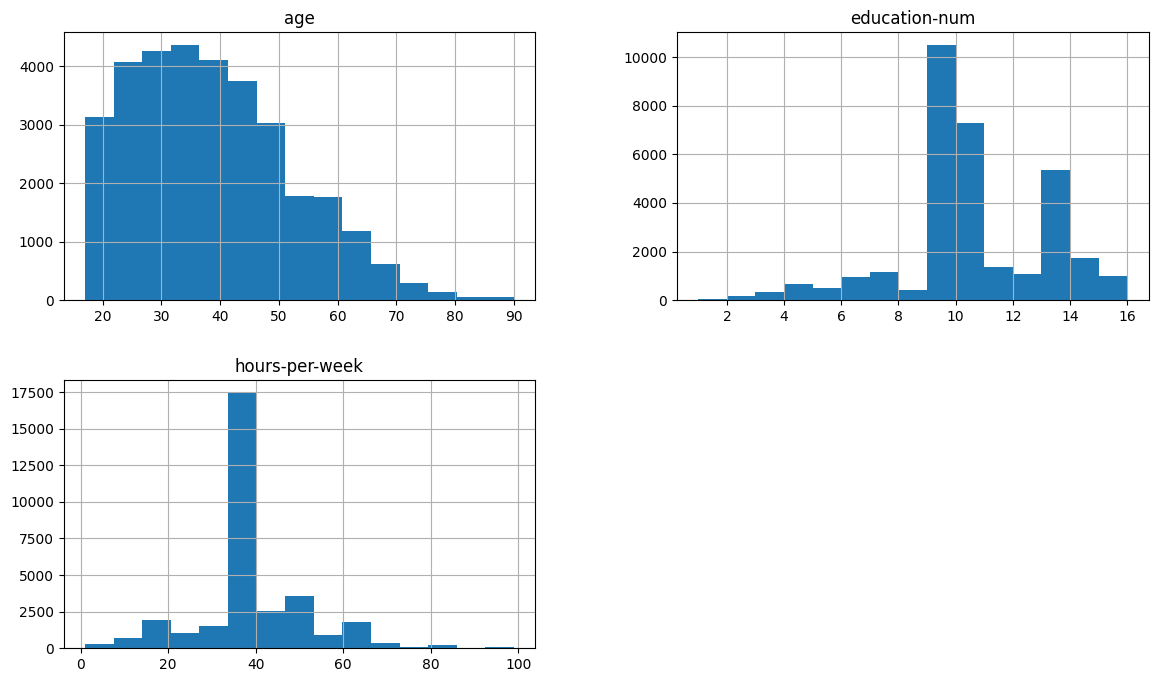

In [171]:
df.hist(bins = 15, figsize=(14, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

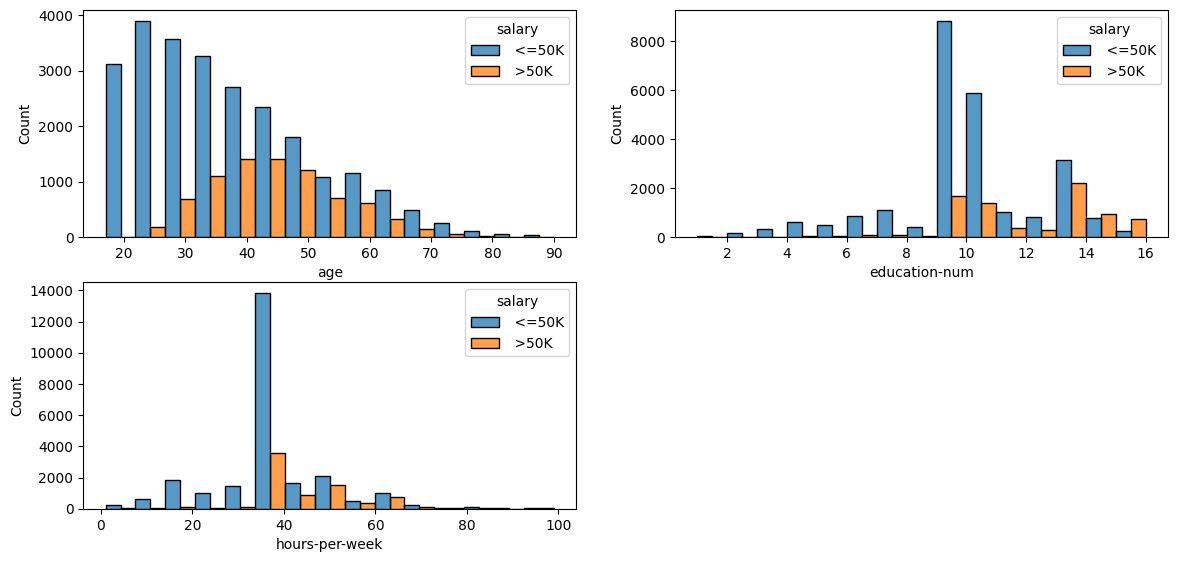

In [172]:
fig = plt.figure()
plt.figure(figsize=(14,10))
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1
    sns.histplot(df, x=col, hue='salary', multiple='dodge', bins=15)
plt.show()

## Countplot

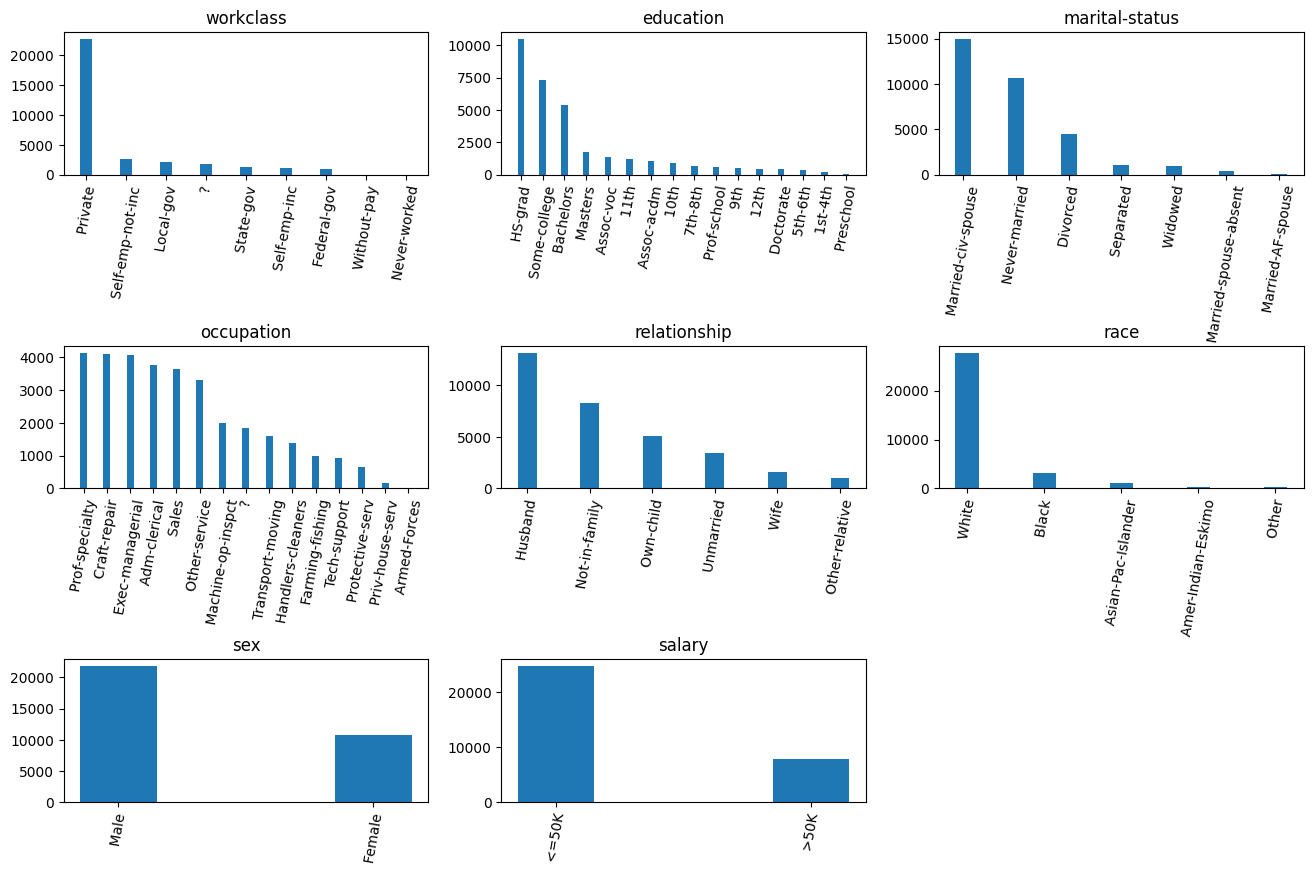

In [173]:
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(hspace=1.2)
i=1

for col in np.array(df.dtypes[df.dtypes!="int64"].index):
    if col=="native-country":
        continue
    ax = plt.subplot(3,3,i)
    i += 1
    count_tmp = df[col].value_counts()
    ax.bar(count_tmp.index, list(count_tmp), width = 0.3)
    plt.xticks(rotation=80)
    plt.title(col)
plt.show()


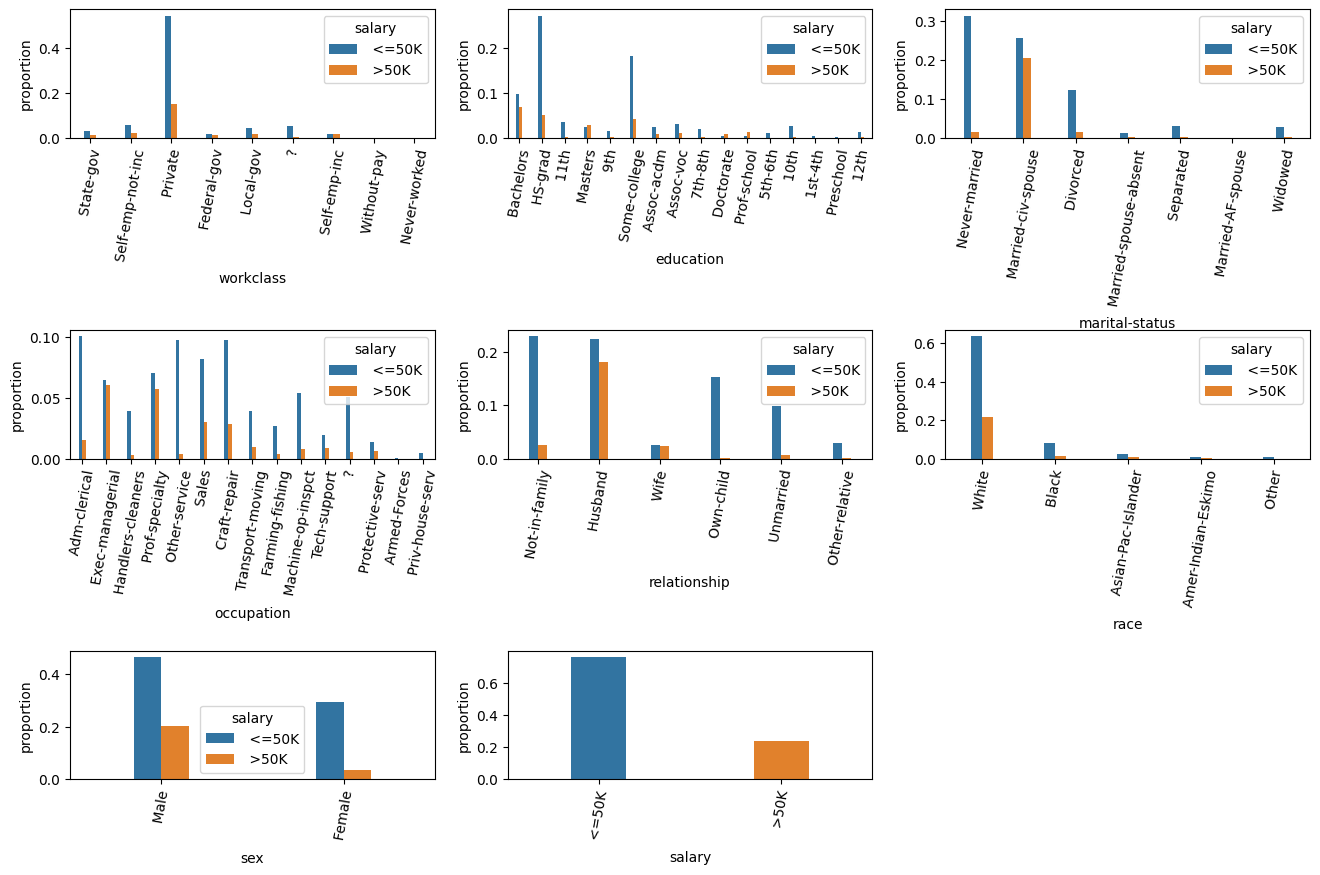

In [174]:
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(hspace=1.5)
i=1

for col in np.array(df.dtypes[df.dtypes!="int64"].index):
    if col=="native-country":
        continue
    ax = plt.subplot(3,3,i)
    i += 1
    count_tmp = df[col].value_counts()
    sns.countplot(df, x=col, hue="salary", width=0.3, stat='proportion')
    plt.xticks(rotation=80)
plt.show()

## Boxplot

<img src="https://miro.medium.com/max/700/1*2c21SkzJMf3frPXPAR_gZA.png" width="600">

<Figure size 640x480 with 0 Axes>

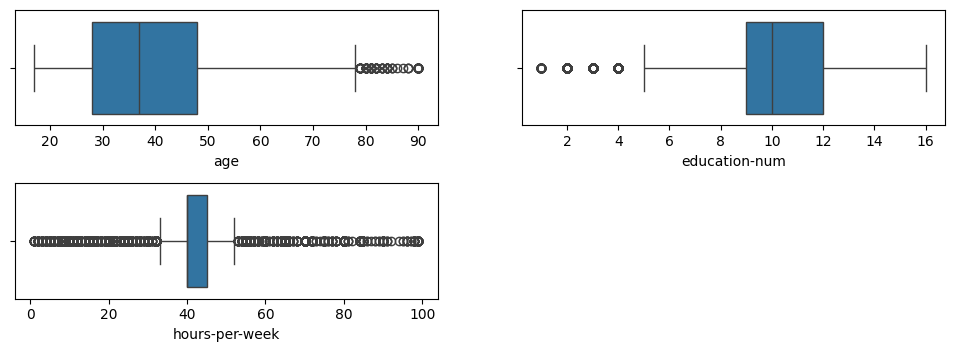

<Figure size 640x480 with 0 Axes>

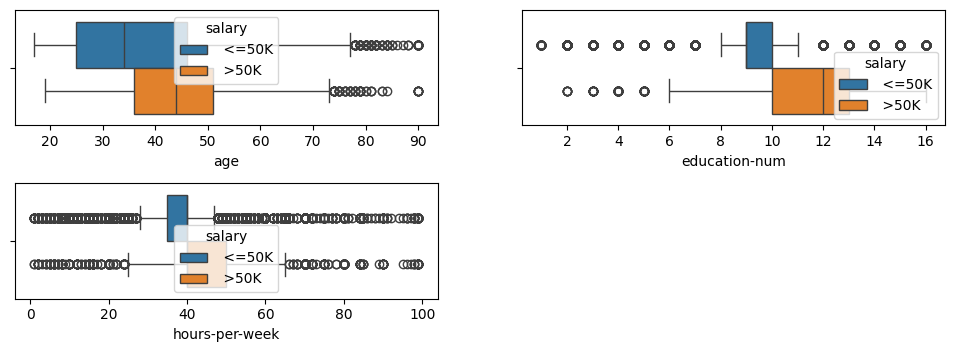

<Figure size 640x480 with 0 Axes>

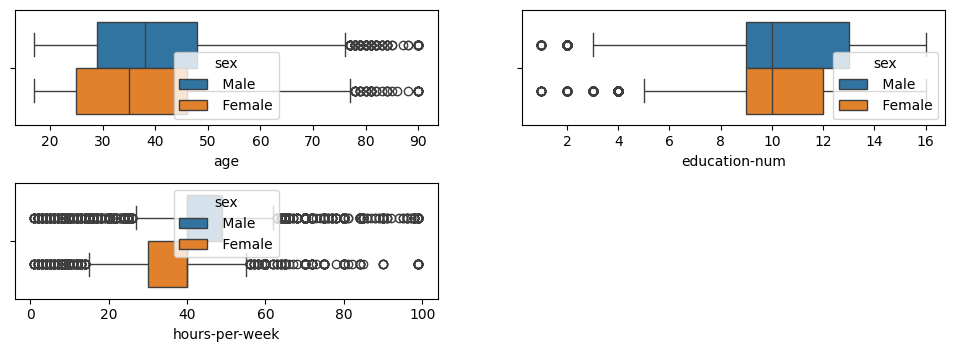

In [175]:
fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1
    sns.boxplot(df, x=col)
plt.show()

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1
    sns.boxplot(df, x=col, hue="salary")
plt.show()

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1
    sns.boxplot(df, x=col, hue="sex")
plt.show()

## Korelacja
- Miara liniowej zależności między dwiema zmiennymi.
- Współczynnik Pearsona r ∈ [-1, 1]:
  - r ≈ 1: silna dodatnia zależność (rosną razem)
  - r ≈ -1: silna ujemna zależność (jedna rośnie, druga maleje)
  - r ≈ 0: brak liniowej zależności
- Korelacja ≠ przyczynowość.
  - Przyczyny korelacji:
      - zmienna trzecia (konfuzor)
      - odwrotna przyczynowość
      - korelacja pozorna (przypadek)
  - Przykład: sprzedaż lodów i utonięcia rosną latem — wspólnym czynnikiem jest temperatura.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1024px-Correlation_examples2.svg.png" width="600">

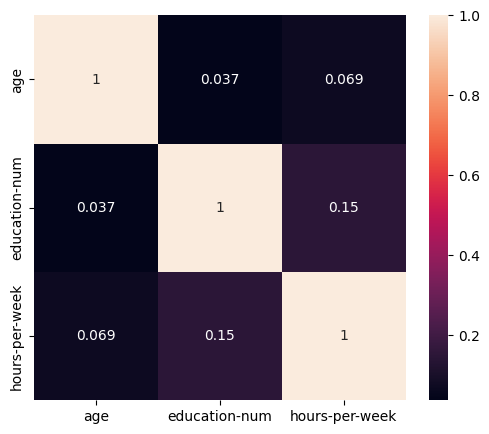

In [176]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)
plt.show()

# Zadania
1. osoby z jaką edukacją są najliczniejśż grupą pośród osób pracujących równo 40 h/tygodniowo?
2. osoby z jaką edukacją są najliczniejśż grupą pośród osób pracujących ponad 60 h/tygodniowo?
3. osoby z jaką edukacją są najliczniejśż grupą pośród osób pracujących mniej niż 20 h/tygodniowo?
4. kto pracuje więcej kobiety czy mężczyźni?

## **Zad 1**

In [ ]:
c40 = df.loc[df['hours-per-week'] == 40, 'education'].value_counts()

c40.plot(kind='bar', title='Edukacja przy 40 h/tydzień', color='steelblue', figsize=(10,4))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### rozwiązanie

In [ ]:
print("Najliczniejsza edukacja (40 h/tydz):", c40.idxmax())

## **Zad 2**

In [ ]:
c60 = df.loc[df['hours-per-week'] > 60, 'education'].value_counts()

c60.plot(kind='bar', title='Edukacja przy >60 h/tydzień', color='tomato', figsize=(10,4))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### rozwiązanie

In [ ]:
print("Najliczniejsza edukacja (>60 h/tydz):", c60.idxmax())

## **Zad 3**

In [ ]:
c20 = df.loc[df['hours-per-week'] < 20, 'education'].value_counts()

c20.plot(kind='bar', title='Edukacja przy <20 h/tydzień', color='seagreen', figsize=(10,4))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### rozwiązanie

In [ ]:
print("Najliczniejsza edukacja (<20 h/tydz):", c20.idxmax())

## **Zad 4**

In [ ]:
male = df.loc[df['sex'] == ' Male', 'hours-per-week']
female = df.loc[df['sex'] == ' Female', 'hours-per-week']

bins = range(int(df['hours-per-week'].min()), int(df['hours-per-week'].max()) + 5, 5)

plt.figure(figsize=(8,4))
plt.hist(male, bins=bins, alpha=0.5, label='Male', color='tab:blue', edgecolor='black', linewidth=0.3)
plt.hist(female, bins=bins, alpha=0.5, label='Female', color='tab:orange', edgecolor='black', linewidth=0.3)
plt.title('Godziny/tydzień: kobiety vs mężczyźni')
plt.xlabel('Godziny/tydzień')
plt.ylabel('Liczba osób')
plt.legend()
plt.tight_layout()
plt.show()


### rozwiązanie

In [ ]:
print("Więcej (średnio) pracują:", "Mężczyźni" if male.mean() > female.mean() else "Kobiety")

## Przygotowanie danych do treningu

## usunięcie duplikatów

In [ ]:
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)

print("Liczba wierszy przed usunięciem duplikatów:", before)
print("Liczba wierszy po usunięciu duplikatów:", after)
print(f"Usunięto duplikatów: {before-after} ({(before-after) / before:.2%})")


## Brakujące dane

In [ ]:
df.isna().sum()

nie ma brakujących danych (na pierwszy rzut oka)

## Unikalne dane w kolumnach kategorycznych

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    vals = sorted(df[col].unique())
    print(f"{col} ({len(vals)}): {vals}")

In [ ]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

## Co zrobić z brakującymi danymi?
- Usunąć: wiersze (dropna) lub kolumny z dużym % braków.
- Zastąpić stałą: 0, 'Unknown'/'Missing' (często dla kategorycznych).
- Imputacja statystyczna: średnia/mediana (numeryczne), moda (kategoryczne).

W tym wypadku jako że nie brakuje dużej ilości danych usuniemy wiersze z brakującymi danymi

## Usuwanie wierszy z NaN

In [ ]:
before = len(df)
df.dropna(inplace=True)
after = len(df)

print("Liczba wierszy przed usunięciem wierszy z Nan:", before)
print("Liczba wierszy po usunięciu:", after)
print(f"Usunięto: {before-after} ({(before-after) / before:.2%})")

In [ ]:
df.isna().sum()

## Przygotowanie kolumn

### Y - label/target

In [ ]:
df.loc[df['salary'] == ' <=50K', 'salary'] = 0
df.loc[df['salary'] == ' >50K', 'salary'] = 1

### X - features

#### Kodowanie zmiennych kategorycznych
- ordinal encoding
- one-hot encoding

##### OneHotEncoding
Niektóre algorytmy mogą na wejście otrzymać tylko zmienne liczbowe dlatego zmienne kategoryczne trzeba w jakiś sposób zamienić na liczby. Najprostszą taką reprezentacją jest OneHotEncoding

![](https://i.imgur.com/mtimFxh.png)

Często też pozbywa się kolumny kodującą pierszwą wartość, ponieważ można i tak to wywnioskować gdy pozostałe kolumny są 0, dlatego ta dodatkowa kolumna nie wnosi żadnej informacji

##### Ordinal encoding

![](https://datasciencedojo.com/wp-content/uploads/Categorical-data-encoding-ordinal-encoding.png)

In [ ]:
before = len(df.columns)
categorical_columns = cat_cols.drop('salary')
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
after = len(df_encoded.columns)

print("Liczba kolumn przed kodowaniem:", before)
print("Liczba kolumn po kodowaniu:", after)
print(f"Dodano kolumn: {after-before}")

df_encoded.head()

In [ ]:
X = df_encoded.drop('salary', axis=1)
y = df_encoded['salary'].astype('int8')

In [ ]:
print("X is of type:", type(X).__name__.split('.')[-1])
print("y is of type:", type(y).__name__.split('.')[-1])

In [ ]:
y.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trening

## Drzewo decyzyjne

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

accuracy_score(preds, y_test)

## gradientowo wzmacnione drzewa decyzyjne

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

accuracy_score(preds, y_test)

# Algebra Liniowa
zachęcam do zapoznania się z plikiem .md, znajdującym się na repozytorium, opisującym podstawy algebry liniowej, niezbędnej w sieciach neuronowych oraz/i obejrzenie serii 3Blue1Brown (link w pliku)

- [Wprowadzenie do algebry liniowej](Wprowadzenie_do_alg_liniowej.md)

- [seria YT 3Blue1Brown](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

# Dla chętnych - we własnym zakresie

## Preprocessing danych o butach, wykorzystując bardziej zaawansowane techniki, oraz wytrenowanie modelu we własnym zakresie

## Identyfikacja problemów

In [ ]:
shoes_df = pd.read_csv('data/menshoes.csv')
shoes_df.head()

In [ ]:
shoes_df.info()

## Usuwanie kolumn z NaN

In [ ]:
threshold = shoes_df.shape[0] * 0.7 # górna granica braku danych w kolumnie to 70%
shoes_df_drop = shoes_df.loc[:, shoes_df.apply(lambda x: x.isna().sum(), axis=0) < threshold]
shoes_df_drop.head(10)

## Imputacja zmiennych kategorycznych

In [ ]:
# popatrzmy na kolory butów
shoes_df_drop['colors'].value_counts()

In [ ]:
pd.DataFrame(shoes_df_drop['colors']).info()

kolumna colors miała dużo nieuzupełnionych wartości  
jak można je uzupełnić?

In [ ]:
# możnaby najczęściej występującym kolorem, ale czy to nie wprowadza fałszywej informacji?
# inne podejście - nowa klasa 'Other'
shoes_df_drop['colors'].fillna('Missing_color')

## Imputacja zmiennych ciągłych

In [ ]:
fake_data=pd.DataFrame({'num':np.random.choice([None, 3,4], 100),
                        'cat': np.random.choice([None, 'Puma','Nike','Adidas'], 100, p=[0.92, 0.03, 0.03, 0.02])})
fake_data.head()

In [ ]:
# średnia czy mediana? -> w sumei to zależy, ale obie opcje są git
fake_data["num"].fillna(fake_data["num"].median(), inplace=True)
fake_data.info()

## Outliery

### Zasada 3 sigma

Dane jedynie z przedziału (średnia +- 3 sigma) - zasadne podejście gdy rozkład normalny

In [ ]:
data=pd.DataFrame({'num':np.random.normal(2,0.4,1000)})
factor = 3
upper_lim = data['num'].mean () + data['num'].std () * factor
lower_lim = data['num'].mean () - data['num'].std () * factor

data = data[(data['num'] < upper_lim) & (data['num'] > lower_lim)]
data.shape

### Usuwanie na podstawie skrajnych percentyli

Wracamy na chwilę do danych o zarobkach

Zmienna `capital-gain`

In [ ]:
# usuwanie na podstawie skrajnych percentyli
# zasadne dla praktycznie każdego rozkładu
gain_data = df['capital-gain']
print('Wejściowy rozmiar: ', gain_data.shape[0])

upper_lim = gain_data.quantile(.95)
lower_lim = gain_data.quantile(.05)

data_percentile = gain_data[(gain_data < upper_lim) & (gain_data > lower_lim)]
print('Wyjściowy rozmiar: ', data_percentile.shape[0])
print('Usunięto %: ', round(data_percentile.shape[0]/gain_data.shape[0], 2))

In [ ]:
plot_box = sns.boxplot(df['capital-gain'])
plot_box.set_title('Rozkład zmiennej capital-gain')
plt.show()

In [ ]:
df["capital-gain"].hist(bins=40)
plt.title('Rozkład zmiennej capital-gain')
plt.show()

---

zmienna `fnlwgt`

In [ ]:
# usuwanie na podstawie skrajnych percentyli
# zasadne dla każdego rozkładu

# w celu zaprezentowania tej metody posłużymy się zbiorem z poprzednich zajęć nt. domów w Bostonie
gain_data = df['fnlwgt']
print('Wejściowy rozmiar: ', gain_data.shape[0])

upper_lim = gain_data.quantile(.95)
lower_lim = gain_data.quantile(.05)

data_percentile = gain_data[(gain_data < upper_lim) & (gain_data > lower_lim)]
print('Wyjściowy rozmiar: ', data_percentile.shape[0])
print('Usunięto %: ', round(data_percentile.shape[0]/gain_data.shape[0], 2))

# Czy zastosowane podejście było dobre?
# @conclusion


przed usunięciem

In [ ]:
plot_box = sns.boxplot(df['fnlwgt'])
plot_box.set_title('Rozkład zmiennej fnlwgt')
plt.show()

In [ ]:
df["fnlwgt"].hist(bins=40)
plt.title('Rozkład zmiennej fnlwgt')
plt.show()

po usunięciu

In [ ]:
data_percentile.hist(bins=40)
plt.title('Rozkład zmiennej fnlwgt')
plt.show()

## Scaling
- min-max scaling
- standaryzacja
- normalizacja
- ...

Niektóre algorytmy nie lubią dużych skal zmiennych.

In [ ]:
# min-max scaling
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
mm_scaler = MinMaxScaler()

print(mm_scaler.fit_transform(data))


In [ ]:
# standarization
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)
print("\n")
print(np.round(np.mean(scaled_data), 4), np.std(scaled_data))

##  Grouping & Binning
Agregujemy klasy do wyższego poziomu lub tniemy zmienną ciągłą na klasy

Czasami potrzebujemy zrobić ze zmiennej ciągłej kategoryczną albo mamy zmienną kategoryczną o bardzo dużej liczbie klas albo dużo klas mało licznych.